In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [3]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
212064,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 09 months,975000.0
212065,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0
212066,2025-07,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,61 years 05 months,980000.0
212067,2025-05,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,61 years 06 months,945000.0


In [4]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [8]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

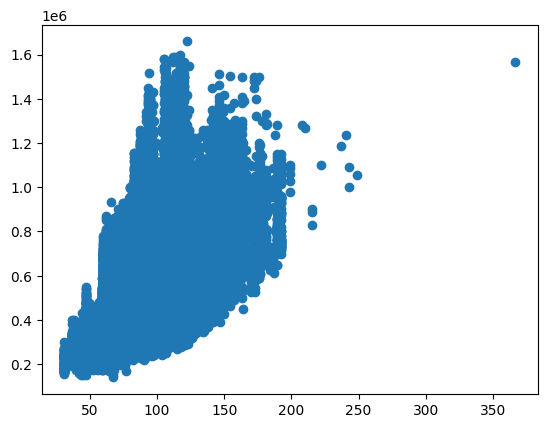

In [9]:
plt.plot(df['floor_area_sqm'], df['resale_price'], 'o')

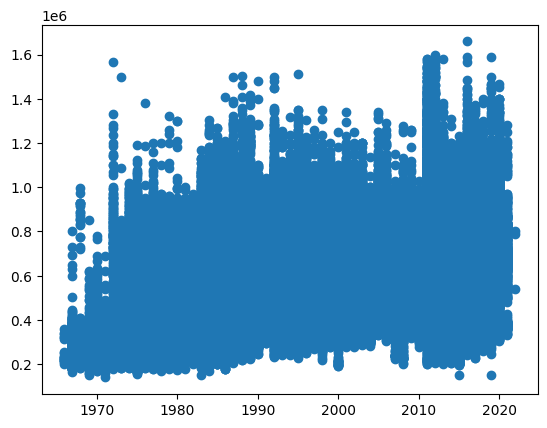

In [10]:
plt.plot(df['lease_commence_date'], df['resale_price'], 'o')

In [11]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [25]:
df[~df['remaining_lease'].str.match(r'(?:(\d+)\s*years?)?\s*(?:(\d+)\s*months?)?')]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price


In [26]:
import re

def convert_lease_date_to_remaining_months(period):
    if pd.isnull(period):
        return np.nan
    
    matches = re.search(r'(?:(\d+)\s*years?)?\s*(?:(\d+)\s*months?)?', period)
    years = int(matches.group(1)) if matches.group(1) else 0
    months = int(matches.group(2)) if matches.group(2) else 0
    return years * 12 + months
    

df['remaining_lease_months'] = df['remaining_lease'].apply(convert_lease_date_to_remaining_months)

In [27]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,749


In [29]:
df['remaining_lease_months'].describe()

count    212069.000000
mean        892.365881
std         170.037127
min         481.000000
25%         752.000000
50%         890.000000
75%        1064.000000
max        1173.000000
Name: remaining_lease_months, dtype: float64

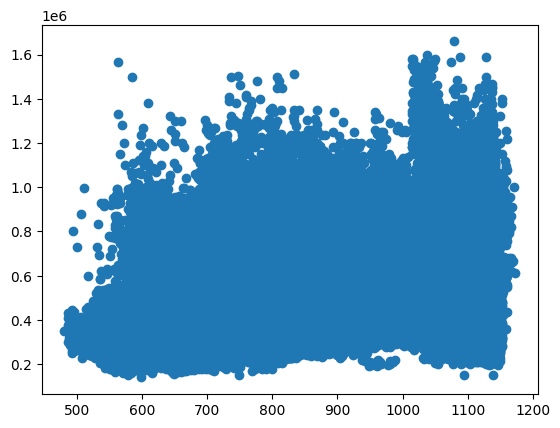

In [28]:
plt.plot(df['remaining_lease_months'], df['resale_price'], 'o')

In [31]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [32]:
def convert_storey_range_to_storey(storey_range):
    if pd.isnull(storey_range):
        return np.nan
    
    matches = re.search(r'(\d+) TO (\d+)', storey_range)
    lower = int(matches.group(1)) if matches.group(1) else 0
    upper = int(matches.group(2)) if matches.group(2) else 0
    return (lower + upper) // 2

df['storey'] = df['storey_range'].apply(convert_storey_range_to_storey)

In [34]:
df['storey'].isna().sum()

np.int64(0)

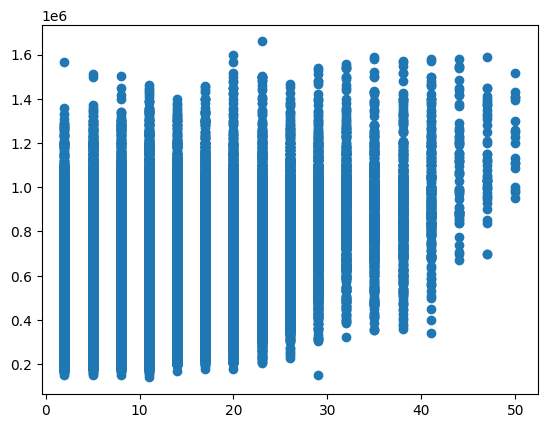

In [35]:
plt.plot(df['storey'], df['resale_price'], 'o')

In [51]:
def months_to_today(month):
    if pd.isnull(month):
        return np.nan
    year, month = map(int, month.split('-'))
    today = pd.Timestamp.now()
    return (today.year - year) * 12 + (today.month - month)

df['month_count'] = df['month'].apply(months_to_today)

In [53]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_months,storey,year,month_count
212064,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 09 months,975000.0,741,5,2025,3
212065,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0,741,5,2025,2
212066,2025-07,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,61 years 05 months,980000.0,737,5,2025,0
212067,2025-05,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,61 years 06 months,945000.0,738,5,2025,2
212068,2025-07,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,01 TO 03,171.0,Multi Generation,1987,61 years 06 months,1095000.0,738,2,2025,0


In [54]:
df['month_count'].describe()

count    212069.00000
mean         48.09528
std          28.93848
min           0.00000
25%          23.00000
50%          47.00000
75%          72.00000
max         102.00000
Name: month_count, dtype: float64

In [59]:
df['resale_price_thousand'] = df['resale_price'] / 1000

In [60]:
df_processed = df[['month_count', 'storey', 'remaining_lease_months', 'floor_area_sqm', 'resale_price_thousand']].dropna()

In [61]:
df_processed.head()

,month_count,storey,remaining_lease_months,floor_area_sqm,resale_price_thousand
0,102,11,736,44.0,232.0
1,102,2,727,67.0,250.0
2,102,2,749,67.0,262.0
3,102,5,745,68.0,265.0
4,102,2,749,67.0,265.0


In [62]:
df_processed.describe()

,month_count,storey,remaining_lease_months,floor_area_sqm,resale_price_thousand
count,212069.00000,212069.000000,212069.000000,212069.000000,212069.000000
mean,48.09528,8.762035,892.365881,96.848015,518.180380
std,28.93848,5.935159,170.037127,24.032285,183.060012
min,0.00000,2.000000,481.000000,31.000000,140.000000
25%,23.00000,5.000000,752.000000,82.000000,380.000000
50%,47.00000,8.000000,890.000000,93.000000,486.000000
75%,72.00000,11.000000,1064.000000,112.000000,620.000000
max,102.00000,50.000000,1173.000000,366.700000,1658.888000


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_processed[['month_count', 'storey', 'remaining_lease_months', 'floor_area_sqm']]
y = df_processed['resale_price_thousand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11731.417835237124
R^2 Score: 0.6491912872998054


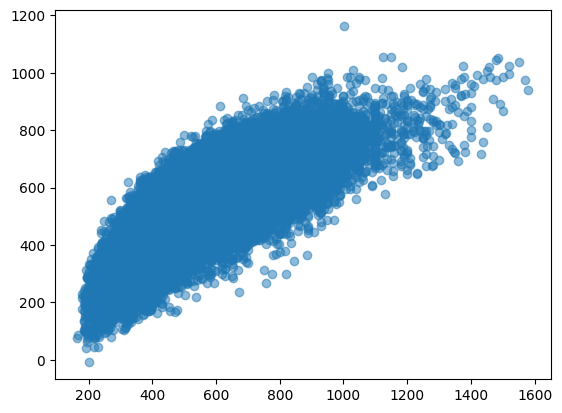

In [71]:
plt.scatter(y_test, y_pred, alpha=0.5)

In [69]:
df_processed.corr()

,month_count,storey,remaining_lease_months,floor_area_sqm,resale_price_thousand
month_count,1.000000,-0.011322,0.036047,0.043754,-0.380608
storey,-0.011322,1.000000,0.272975,-0.014323,0.342462
remaining_lease_months,0.036047,0.272975,1.000000,0.110283,0.308257
floor_area_sqm,0.043754,-0.014323,0.110283,1.000000,0.578482
resale_price_thousand,-0.380608,0.342462,0.308257,0.578482,1.000000
